# Activity: Perform feature engineering 

## **Introduction**


As you're learning, data professionals working on modeling projects use featuring engineering to help them determine which attributes in the data can best predict certain measures.

In this activity, you are working for a firm that provides insights to the National Basketball Association (NBA), a professional North American basketball league. You will help NBA managers and coaches identify which players are most likely to thrive in the high-pressure environment of professional basketball and help the team be successful over time.

To do this, you will analyze a subset of data that contains information about NBA players and their performance records. You will conduct feature engineering to determine which features will most effectively predict whether a player's NBA career will last at least five years. The insights gained then will be used in the next stage of the project: building the predictive model.


## **Step 1: Imports** 


Start by importing `pandas`.

In [1]:
# Import pandas.

### YOUR CODE HERE ###
import pandas as pd

The dataset is a .csv file named `nba-players.csv`. It consists of performance records for a subset of NBA players. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Save in a variable named `data`.

### YOUR CODE HERE ###

data = pd.read_csv("nba-players.csv", index_col=0)

<details><summary><h4><strong>Hint 1</strong></h4></summary>

The `read_csv()` function from `pandas` allows you to read in data from a csv file and load it into a DataFrame.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

Call the `read_csv()`, pass in the name of the csv file as a string, followed by `index_col=0` to use the first column from the csv as the index in the DataFrame.
    
</details>

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of what it entails.

In [3]:
# Display first 10 rows of data.

### YOUR CODE HERE ###
data.head(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `pandas` library that can be called on a DataFrame to display the first n number of rows, where n is a number of your choice. 
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `head()` function and pass in 10.
</details>

Display the number of rows and the number of columns to get a sense of how much data is available to you.

In [4]:
# Display number of rows, number of columns.

### YOUR CODE HERE ###
data.shape

(1340, 21)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

DataFrames in `pandas` have an attribute that can be called to get the number of rows and columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

You can call the `shape` attribute.
</details>

**Question:** What do you observe about the number of rows and the number of columns in the data?

 [Write your response here. Double-click (or enter) to edit.]

Now, display all column names to get a sense of the kinds of metadata available about each player. Use the columns property in pandas.


In [5]:
# Display all column names.

### YOUR CODE HERE ###
data.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

The following table provides a description of the data in each column. This metadata comes from the data source, which is listed in the references section of this lab.

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

Next, display a summary of the data to get additional information about the DataFrame, including the types of data in the columns.

In [6]:
# Use .info() to display a summary of the DataFrame.

### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov        

**Question:** Based on the preceding tables, which columns are numerical and which columns are categorical?

name is numerical and target_5yrs is categorical

### Check for missing values

Now, review the data to determine whether it contains any missing values. Begin by displaying the number of missing values in each column. After that, use isna() to check whether each value in the data is missing. Finally, use sum() to aggregate the number of missing values per column.


In [7]:
# Display the number of missing values in each column.
# Check whether each value is missing.
#Aggregate the number of missing values per column.

### YOUR CODE HERE ###
# Display number of missing values in each column
print("Missing values per column:")
print(data.isnull().sum())

# Check whether each value is missing and show first few rows
print("\nMissing value check (first few rows):")
print(data.isna().head())


Missing values per column:
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

Missing value check (first few rows):
    name     gp    min    pts    fgm    fga     fg  3p_made    3pa     3p  \
0  False  False  False  False  False  False  False    False  False  False   
1  False  False  False  False  False  False  False    False  False  False   
2  False  False  False  False  False  False  False    False  False  False   
3  False  False  False  False  False  False  False    False  False  False   
4  False  False  False  False  False  False  False    False  False  False   

   ...    fta     ft   oreb   dreb    reb    ast    stl    blk    tov  \
0  ...  False  False  False 

**Question:** What do you observe about the missing values in the columns? 

no missing values

**Question:** Why is it important to check for missing values?

null values can impact modeling and disrupt performance

## **Step 3: Statistical tests** 



Next, use a statistical technique to check the class balance in the data. To understand how balanced the dataset is in terms of class, display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.

In [13]:
# Display percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

### YOUR CODE HERE ###
print(data['target_5yrs'].value_counts())
print("\nPercentage of values in each class:")
print((data['target_5yrs'].value_counts(normalize=True) * 100).round(2))



target_5yrs
1    831
0    509
Name: count, dtype: int64

Percentage of values in each class:
target_5yrs
1    62.01
0    37.99
Name: proportion, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

In `pandas`, `value_counts(normalize=True)` can be used to calculate the frequency of each distinct value in a specific column of a DataFrame.  
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

After `value_counts(normalize=True)`, multipling by `100` converts the frequencies into percentages (%).
</details>

**Question:** What do you observe about the class balance in the target column?

About 2/3rds of players have been playing for over 5 years

**Question:** Why is it important to check class balance?

To determine if up or downsampling might be necessary

## **Step 4: Results and evaluation** 


Now, perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, `target_5yrs`. 

### Feature selection

The following table contains descriptions of the data in each column:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

**Question:** Which columns would you select and avoid selecting as features, and why? Keep in mind the goal is to identify features that will serve as useful predictors for the target variable, `target_5yrs`. 

 [Write your response here. Double-click (or enter) to edit.]

Next, select the columns you want to proceed with. Make sure to include the target column, `target_5yrs`. Display the first few rows to confirm they are as expected.

In [15]:
# Select the columns to proceed with and save the DataFrame in new variable `selected_data`.
# Include the target column, `target_5yrs`.

### YOUR CODE HERE ###
selected_data = data[["gp", "min", "pts", "fg", "3p", "ft", "reb", "ast", "stl", "blk", "tov", "target_5yrs"]]

# Display the first few rows.

### YOUR CODE HERE ###

selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature selection and selecting a subset of a DataFrame.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use two pairs of square brackets, and place the names of the columns you want to select inside the innermost brackets. 

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

There is a function in `pandas` that can be used to display the first few rows of a DataFrame. Make sure to specify the column names with spelling that matches what's in the data. Use quotes to represent each column name as a string. 
</details>

### Feature transformation

An important aspect of feature transformation is feature encoding. If there are categorical columns that you would want to use as features, those columns should be transformed to be numerical. This technique is also known as feature encoding.

**Question:** Why is feature transformation important to consider? Are there any transformations necessary for the features you want to use?

 [Write your response here. Double-click (or enter) to edit.]

### Feature extraction

Display the first few rows containing containing descriptions of the data for reference. The table is as follows:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

In [16]:
# Make a copy of `selected_data` 
extracted_data = selected_data.copy()

# Add a new column named `total_points`; 
# Calculate total points earned by multiplying the number of games played by the average number of points earned per game
extracted_data["total_points"] = extracted_data["gp"] * extracted_data["pts"]

# Add a new column named `efficiency`. Calculate efficiency by dividing the total points earned by the total number 
# of minutes played, which yields points per minute. (Note that `min` represents avg. minutes per game.)
extracted_data["efficiency"] = extracted_data["total_points"] / (extracted_data["min"] * extracted_data["gp"])

# Display the first few rows of `extracted_data` to confirm that the new columns were added.
extracted_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


**Question:** Which columns lend themselves to feature extraction?

 [Write your response here. Double-click (or enter) to edit.]

Extract two features that you think would help predict `target_5yrs`. Then, create a new variable named 'extracted_data' that contains features from 'selected_data', as well as the features being extracted.

In [17]:

# Create a new variable named `extracted_data`.

extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])

# Display the first few rows of `extracted_data` to ensure that column drops took place.

### YOUR CODE HERE ###

extracted_data.head()




,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature extraction.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function `copy()` to make a copy of a DataFrame. To access a specific column from a DataFrame, use a pair of square brackets and place the name of the column as a string inside the brackets.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use a pair of square brackets to create a new column in a DataFrame. The columns in DataFrames are series objects, which support elementwise operations such as multiplication and division. Be sure the column names referenced in your code match the spelling of what's in the DataFrame.
</details>

Now, to prepare for the Naive Bayes model that you will build in a later lab, clean the extracted data and ensure ensure it is concise. Naive Bayes involves an assumption that features are independent of each other given the class. In order to satisfy that criteria, if certain features are aggregated to yield new features, it may be necessary to remove those original features. Therefore, drop the columns that were used to extract new features.

**Note:** There are other types of models that do not involve independence assumptions, so this would not be required in those instances. In fact, keeping the original features may be beneficial.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature extraction.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There are functions in the `pandas` library that remove specific columns from a DataFrame and that display the first few rows of a DataFrame.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `drop()` function and pass in a list of the names of the columns you want to remove. By default, calling this function will result in a new DataFrame that reflects the changes you made. The original DataFrame is not automatically altered. You can reassign `extracted_data` to the result, in order to update it. 

Use the `head()` function to display the first few rows of a DataFrame.
</details>

Next, export the extracted data as a new .csv file. You will use this in a later lab. 

In [18]:
# Export the extracted data.

extracted_data.to_csv("extracted_nba_players_data.csv", index=0)



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `pandas` library that exports a DataFrame as a .csv file. 
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `to_csv()` function to export the DataFrame as a .csv file. 
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `to_csv()` function on `extracted_data`, and pass in the name that you want to give to the resulting .csv file. Specify the file name as a string and in the file name. Make sure to include `.csv` as the file extension. Also, pass in the parameter `index` set to `0`, so that when the export occurs, the row indices from the DataFrame are not treated as an additional column in the resulting file. 
</details>

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you followed and what tasks were performed during each step, as well as important priorities when training data.**

 [Write your response here. Double-click (or enter) to edit.]

**What summary would you provide to stakeholders? Consider key attributes to be shared from the data, as well as upcoming project plans.**

 [Write your response here. Double-click (or enter) to edit.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

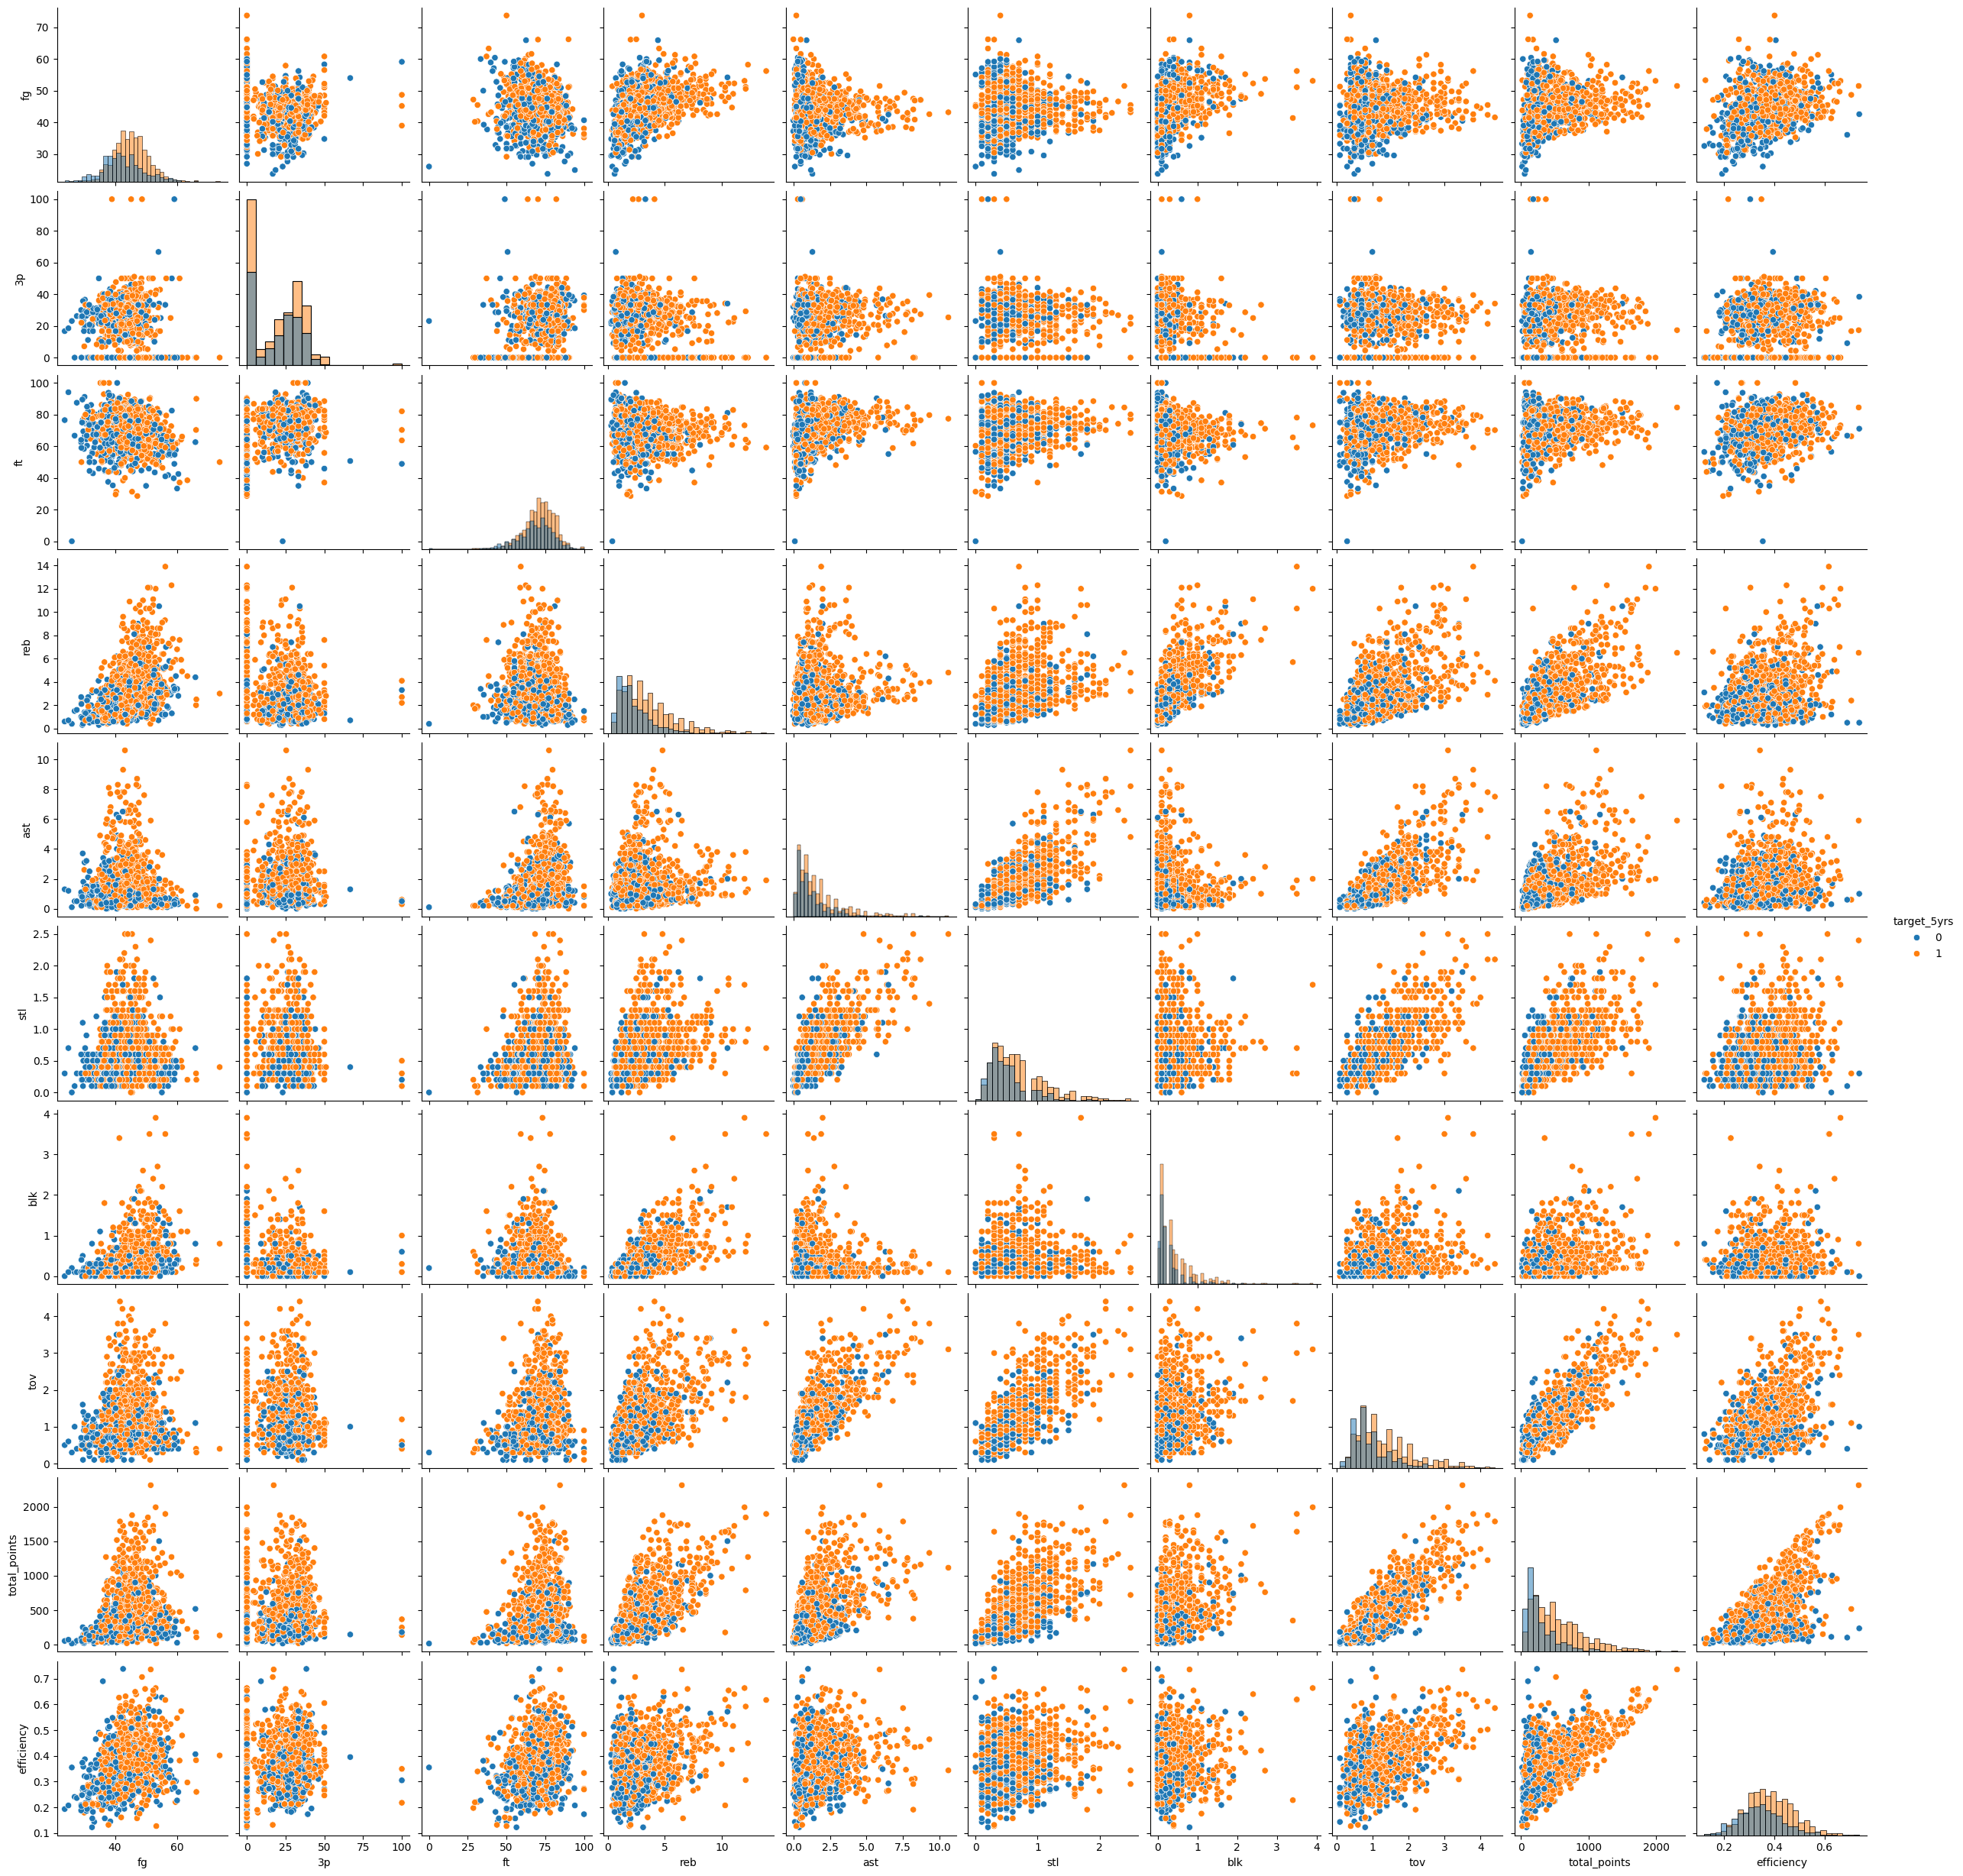

In [19]:
# Create pairplot to visualize relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.pairplot(extracted_data, hue='target_5yrs', diag_kind='hist')
plt.show()


In [20]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Split features and target
X = extracted_data.drop('target_5yrs', axis=1)
y = extracted_data['target_5yrs']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions and print accuracy
train_accuracy = xgb_model.score(X_train_scaled, y_train)
test_accuracy = xgb_model.score(X_test_scaled, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


Training accuracy: 0.9841
Test accuracy: 0.6716


In [22]:
# Calculate MSE for XGBoost model
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)

print(f"XGBoost Training MSE: {train_mse_xgb:.4f}")
print(f"XGBoost Test MSE: {test_mse_xgb:.4f}")


XGBoost Training MSE: 0.0159
XGBoost Test MSE: 0.3284


In [21]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate MSE for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Training MSE: 0.0159
Test MSE: 0.2910


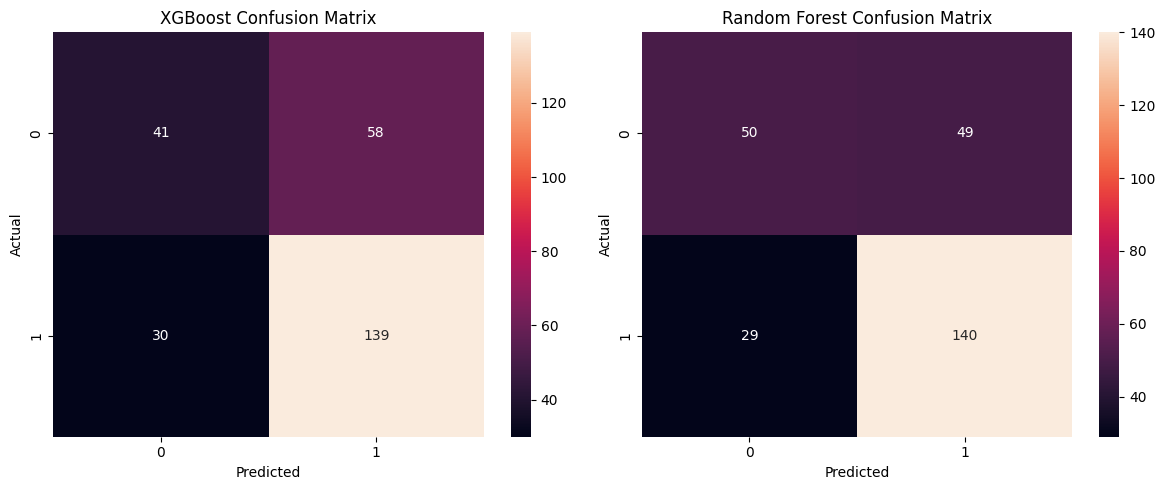

In [24]:
# Import confusion_matrix and plot libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrices
xgb_cm = confusion_matrix(y_test, y_test_pred_xgb)
rf_cm = confusion_matrix(y_test, y_test_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot XGBoost confusion matrix
sns.heatmap(xgb_cm, annot=True, fmt='d', ax=ax1)
ax1.set_title('XGBoost Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot Random Forest confusion matrix 
sns.heatmap(rf_cm, annot=True, fmt='d', ax=ax2)
ax2.set_title('Random Forest Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [27]:
from xgboost import XGBClassifier
# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    booster='gbtree',
    random_state=42,
    eta=1,
    num_parallel_tree=100,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate MSE for both train and test sets
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)

print(f"XGBoost Training MSE: {train_mse_xgb:.4f}")
print(f"XGBoost Test MSE: {test_mse_xgb:.4f}")


XGBoost Training MSE: 0.0159
XGBoost Test MSE: 0.3396
